<h1>Zadanie 1<h1>

Text(0.5, 1.0, 'thresh for brain')

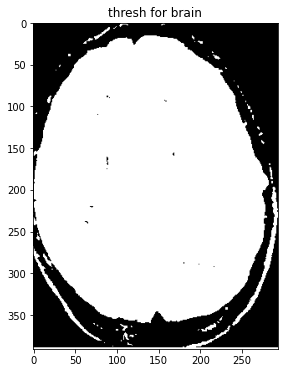

In [9]:
from skimage.filters import try_all_threshold, threshold_minimum
from skimage import io
import matplotlib.pyplot as plt

image = io.imread('brain_tumor.png')

thresh = threshold_minimum(image)
binary_brain = image > thresh

fig, ax = plt.subplots(figsize=(12, 6))
ax.imshow(binary_brain, cmap=plt.cm.gray)
ax.set_title("thresh for brain")

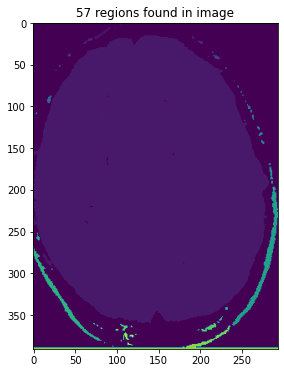

In [10]:
from skimage.measure import label
from skimage.color import label2rgb, gray2rgb

label_image, regions_brain = label(binary_brain, return_num=True)
#color = label2rgb(label_image,image=binary, bg_label=0)

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title(str(regions_brain) + " regions found in image")
ax.imshow(label_image)

Text(0.5, 1.0, 'brain size is = 75226')

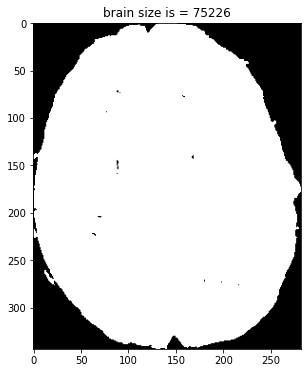

In [11]:
from skimage.measure import regionprops

region = regionprops(label_image)

max = 0
index = 0

for i in range(len(region)):
    if region[i].area > max:
        max = region[i].area
        index = i

brain_region = region[index].image.copy()

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(brain_region, cmap='gray')
ax.set_title("brain size is = " + str(max))

Text(0.5, 1.0, 'tumor size is = 5191')

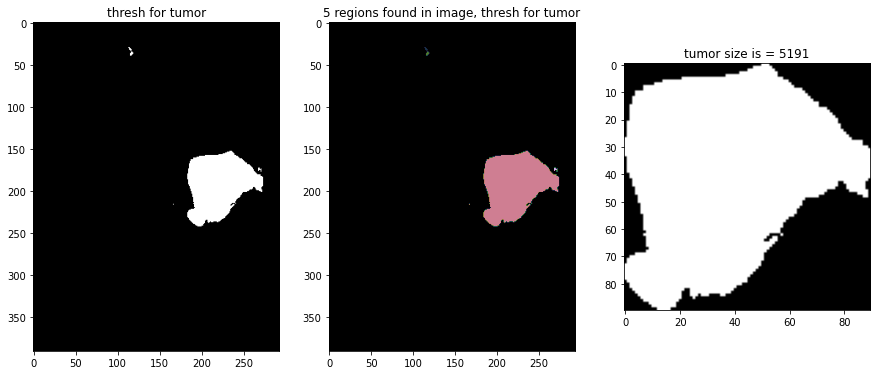

In [12]:
t = 220
binary_tumor = (image > t) * 1

label_image, regions_tumor = label(binary_tumor, return_num=True)
region = regionprops(label_image)

max = 0
index = 0
for i in range(len(region)):
    if region[i].area > max:
        max = region[i].area
        index = i

tumor_region = region[index].image.copy()       
fig, ax = plt.subplots(ncols=3, figsize=(15,10))

ax[0].imshow(binary_tumor, cmap='gray')
ax[0].set_title("thresh for tumor")

ax[1].imshow(label_image, cmap='cubehelix')
ax[1].set_title(str(regions_tumor) + " regions found in image, thresh for tumor")

ax[2].imshow(tumor_region, cmap='gray')
ax[2].set_title("tumor size is = " + str(max))

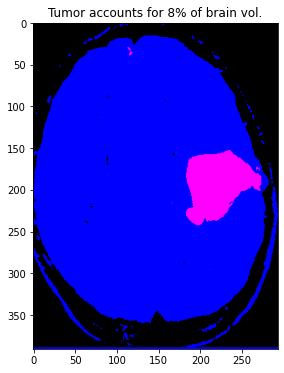

In [13]:
brain = binary_brain.copy().astype('float64')
tumor = binary_tumor.copy().astype('float64')

blue = [0, 0, 1]
purple = [1, 0, 1]

brain = gray2rgb(brain)
tumor = gray2rgb(tumor)

brain = brain * blue
tumor = tumor * purple

brain_copy = brain.copy()
for i in range(brain_copy.shape[0]):
    for j in range(brain_copy.shape[1]):
        if tumor[i][j][2] == 1:
            brain_copy[i][j] = tumor[i][j]

size = regions_tumor * 100 // regions_brain

plt.figure(figsize=(12,6))
plt.imshow(brain_copy)
plt.title("Tumor accounts for " + str(size) + "% of brain vol.")
plt.show()

<h1>Zadanie 2<h1>

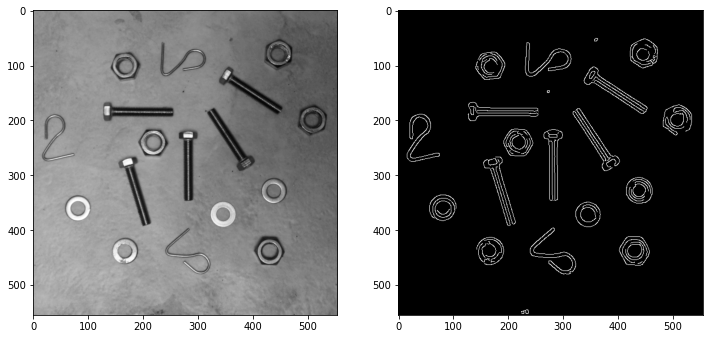

In [14]:
from skimage.color import rgb2gray
from skimage.filters import gaussian
from skimage import feature
from skimage.transform import resize

image = io.imread("bolts.jpg")
image_gray = rgb2gray(image)
div = 5
sigma = 15

image_resized = resize(image_gray, (image_gray.shape[0] // div, image_gray.shape[1] // div))
noise = gaussian(image_resized, sigma)
diff = abs(image_resized - noise)
sigma = 1.5
canny_filter = feature.canny(diff, sigma)

fig, ax = plt.subplots(ncols=2, figsize=(12,6))
ax[0].imshow(image_resized, cmap='gray')
ax[1].imshow(canny_filter, cmap='gray')
plt.show()

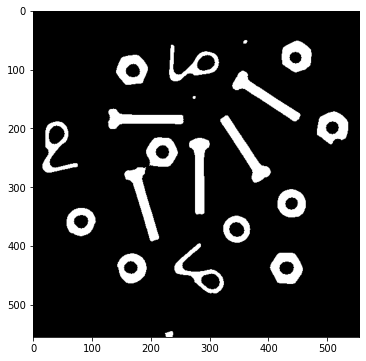

In [15]:
from skimage.morphology import closing
from skimage.segmentation import clear_border
from skimage.morphology import disk

cb = clear_border(canny_filter)
close = closing(cb, disk(9))
plt.figure(figsize=(12,6))
plt.imshow(close, cmap='gray')
plt.show()

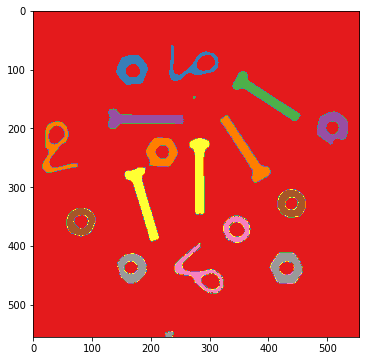

In [16]:
temp = label(close)
plt.figure(figsize=(12,6))
plt.imshow(temp, cmap='Set1')
plt.show()